**Download** (right-click, save target as ...) this page as a Jupyterlab notebook from: [ES-3](http://54.243.252.9/ce-4353-webroot/2-Exercises/ES3/ES3.ipynb)

___

# <font color=darkblue>CE 4353/5360 Design of Hydraulic Systems <br> Fall 2022 Exercise Set 3</font>

**LAST NAME, FIRST NAME**

**R00000000**

___

### Purpose : 
Apply principles of specific energy in open channel transitions
 
### Assessment Criteria : 
Completion, results plausible, format correct, calculations (Jupyter Notebook) are shown.  

___

## Problem 1

A subcritical transition from an upstream rectangular flume that is 49 $ft$ wide to a downstream trapezoidal channel with a width of 75 $ft$ and side slopes of 2:1.
The transition bottom drops 1 $ft$ from the upstream flume to the downstream trapezoidal channel.  The steady discharge is 12,600 $cfs$ and the depth of flow in the downstream channel is 22 $ft$.  For a head loss coefficient of 0.5

Determine:

- The approach flow depth (in the rectangular flume).


# sketch(s) here

![](Problem1.png)

# list known quantities

- $y_2$

- $B_1$

- $B_2$

- $m$

- $Q$

- Geometry each section

- $\Delta z$

# list unknown quantities

- $y_1$

# governing principles

- Modified Bernoulli for open channels

In [126]:
# solution (step-by-step/computations)
import math
y1 = 19.880 # <<< Guess and adjust this value
y2 = 22.0 # ft given
Q = 12600 # cfs given
g = 32.2 # ft/s/s given
b1 = 49.0 # given
b2 = 75.0 # given
m2 = 2.0 #given
Dz = -1.0 #given
Kl = 0.5 #given
deltaY = 0.0001
tolerance = 0.0001


for i in range(10000):
    y1 = y1+float(i)*deltaY
    Q2g = (Q**2/(2.0*g))
    A1 = b1*y1
    A2 = y2*(b2+m2*y2)
    E1 = y1 + Q2g/(A1**2)
    E2 = y2 + Q2g/(A2**2)
    LHS = E1
    RHS = E2 + Dz + Kl*abs(1/(A1**2)-1/(A2**2))*Q2g
    if abs(LHS-RHS) <= tolerance:
        print("y1 ",round(y1,3),"y2",round(y2,3)," Energy Error ",round(LHS-RHS,3))
        

y1  19.881 y2 22.0  Energy Error  0.0


# discussion

By a "brute force" search approach depth is 19.881 feet.

---

## Problem 2

A circular culvert with 1.0 $m$ diameter is placed on a steep slope.  The upstream head is 1.3 $m$ with an unsubmerged entrance. Neglect entrance losses and

Determine:

- The discharge through the culvert.
- The critical depth at the entrance.


# sketch(s) here

![](Problem2.1.png) <!--![](Problem2.2.png)-->

# list known quantities

- $E_o$
- Unsubmerged inlet
- Neglect head losses
- Hydraulically steep slope

# list unknown quantities

- $y_c$  Just before jump close to inlet most likely
- $Q$

# governing principles

- Energy balance, critical energy
- Algebra too!

# solution (step-by-step/computations)

Algorithm

![](Problem2.2.png)

In [127]:
# prototype functions
def area(theta,diameter):
    import math
    area=(1/8)*(theta-math.sin(theta))*diameter**2
    return(area)

def topw(theta,diameter):
    import math
    topw=diameter*math.sin(theta/2)
    return(topw)

def angle(depth,diameter):
    angle=2*math.acos(1-2*depth/diameter)
    return(angle)

# solution script
import math
g = 9.81
D = 1.0
y = 0.8825  # <<< Guess this value
Ec = 1.3

Q = math.sqrt(g*area(angle(y,D),D)**3/topw(angle(y,D),D))
E = y+Q**2/(2*g*area(angle(y,D),D))
print("Entrance Depth = ",round(y,3)," meters \nDischarge = ",round(Q,3)," m^3/sec \nEnergy Balance Error = ",round(E-Ec,3))

Entrance Depth =  0.882  meters 
Discharge =  2.452  m^3/sec 
Energy Balance Error =  0.0


# discussion

Brute force, non-elegant, balance two sides of equation by guess-and-check.

---

## Problem 3

A 1.0 $m$ by 1.0 $m$ box culvert is placed on a steep slope.  The upstream head is 1.3 $m$ with an unsubmerged entrance. Neglect entrance losses and

Determine:

- The discharge through the culvert.
- The critical depth at the entrance.


# sketch(s) here

![](Problem3.png)

# list known quantities

- $E_o$
- Unsubmerged inlet
- Neglect head losses
- Hydraulically steep slope

# list unknown quantities

- $y_c$  Just before jump close to inlet most likely
- $Q$

# governing principles

- Energy balance, critical energy
- Algebra too!

Algorithm: 
    
![](Problem2.2.png)

In [128]:
# solution (step-by-step/computations)
# prototype functions
def area(width,depth):
    import math
    area=width*depth
    return(area)

# solution script
import math
g = 9.81
W = 1.0
y = 0.8975 # <<< Guess this value
Ec = 1.3

Q = math.sqrt(g*area(W,y)**3/W)
E = y+Q**2/(2*g*area(W,y))
print("Entrance Depth = ",round(y,3)," meters \nDischarge = ",round(Q,3)," m^3/sec \nEnergy Balance Error = ",round(E-Ec,3))

Entrance Depth =  0.897  meters 
Discharge =  2.663  m^3/sec 
Energy Balance Error =  0.0


# discussion

Yea, just reuse code, change geometry

---

## Problem 4

A study of natural channel shapes in the western United States reported an average ratio of maximum depth to hydraulic depth ($D=\frac{A}{T}$) in the main channel (with no overflow) of $\frac{y}{D} = 1.55$ for 761 measurements.

Determine:

- The calculated ratio of maximum depth to hydraulic depth for a triangular channel.
- The calculated ratio of maximum depth to hydraulic depth for a parabolic channel.
- The calculated ratio of maximum depth to hydraulic depth for a rectangular channel.
- The significance of these calculated results to the study's reported average.
- The discharge for a channel at a critical depth of $y=10.0~ft$ if $\frac{y}{D} = 1.55$ and $T=100~ft$.


# sketch(s) here

![](Problem4-triangle.png)

![](Problem4-parabola.png)

![](Problem4-rectangle.png)

# list known quantities

# list unknown quantities

# governing principles

Algebra baby!

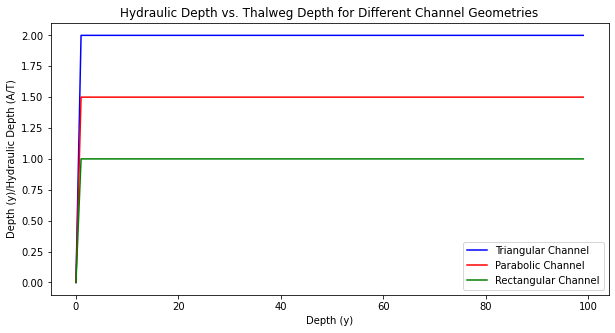

Average y/D value all depths, all geometries  1.485


In [129]:
# solution (step-by-step/computations)
# For bullet items 1-3
# Bullet 4 in discussion below

y = [0 for i in range(100)]
dtrig = [0 for i in range(100)]
dpara = [0 for i in range(100)]
drect = [0 for i in range(100)]
YoverD = [0 for i in range(100)]

sum = 0.0

for i in range(1,100): # 1 to 10 in steps of 0.01
    y[i] = 100.0*float(i/100)
    dtrig[i]=y[i]/(y[i]/2.0)
    dpara[i]=y[i]/(2.0*y[i]/3.00)
    drect[i]=y[i]/(y[i])
    sum +=(dtrig[i]+dpara[i]+drect[i])/3.0
    
import matplotlib.pyplot # the python plotting library
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio
# Built the plot
matplotlib.pyplot.plot(y, dtrig, color ='blue') 
matplotlib.pyplot.plot(y, dpara, color ='red') 
matplotlib.pyplot.plot(y, drect, color ='green') 
matplotlib.pyplot.xlabel("Depth (y)") 
matplotlib.pyplot.ylabel("Depth (y)/Hydraulic Depth (A/T)") 
matplotlib.pyplot.title("Hydraulic Depth vs. Thalweg Depth for Different Channel Geometries")
matplotlib.pyplot.legend(["Triangular Channel","Parabolic Channel","Rectangular Channel"])
matplotlib.pyplot.show() 



print("Average y/D value all depths, all geometries ",round(sum/100.0,3))


In [130]:
# bullet item 4
import math
g = 32.2
yc = 10
yOd = 1.55
T = 100
D = yc/yOd
A = T*D
Ec = yc+D/2.0
QQ = 2*g*(Ec-yc)*A**2
Q = math.sqrt(QQ)
#Q = math.sqrt(g*(A**3)/T) # or do the algebra
print("Discharge ",round(Q,3)," CFS")

Discharge  9298.875  CFS


# discussion

Average for natural channels is 1.55, so natural channels tend to be close to parabolic (y/D =1.5), with some suggestion of rectangularization (some near vertical side walls).  In absence of good bathymetry, a parabola is a useful approximation.

---

## Problem 5 (Application of ENGR-1330 Computational Thinking)

Prepare a function (within a JupyterLab Notebook) to compute head-discharge relationships for a rectangular, sharp-crested weir, and another function to compute head-discharge relationship for a 90$^o$ V-notch sharp-crested weir.

Incorporate your functions into a supervisory script (a main program) and apply to a situation where the weir is placed in a 5 $ft$ wide channel with the weir crests are 1 $ft$ above the channel bottom.

Determine:

- Head vs discharge for the rectangular weir with a crest width of 1 $ft$ for approach head in the range $0 - 0.5~ft$
- Head vs discharge for the V-notch weir for approach head in the range $0 - 0.5~ft$
- Plot both relationships on the same figure (2 curves, 1 graph); properly label the axes of the plot including units,include a plot title, and include a plot legend altering both color and marker type to distinguish between the two different weirs.


In [131]:
# sketch(s) here

In [132]:
# list known quantities

In [133]:
# list unknown quantities

In [134]:
# governing principles

In [135]:
# solution (step-by-step/computations)


In [136]:
# Rectangular weir formula
def Qrect(C_de,L_e,H_e,g):
    import math
    Qrect=(2/3)*math.sqrt(2.0*g)*C_de*L_e*(H_e**(3/2))
    return(Qrect)

In [137]:
# Kindsvater-Carter formula interpolation

def lagint(xlist,ylist,xpred):
    # lagrangian interpolation of order len(xlist)-1 
    # 
    lagint = 0.0 # ypred is an accumulator, and will be output
    norder = len(xlist)
    for i in range(norder):
        term = ylist[i] # build up terms of polynomial
        for j in range(norder):
            if (i != j):
                term = term * (xpred-xlist[j])/(xlist[i]-xlist[j])
#            pass # may not need this expression
        lagint = lagint + term
#    print(i,j) #debugging expression
    return(lagint)

L_over_b = [1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0]
beta1 = [0.602,0.599,0.597,0.595,0.593,0.592,0.591,0.59,0.589,0.588,0.587]
beta2 = [0.075,0.064,0.045,0.03,0.018,0.011,0.0058,0.002,-0.0018,-0.0021,-0.0023]

In [138]:
#

L = 1.0 # feet crest width
H = [0.0,0.1,0.2,0.3,0.4,0.5] # approach heads
B = 5 # ft given
k_l = 0.002 #chart 2.23(c) pg 44
k_h = 0.003 #ft pg 44
P = 0.3 #ft minimum value suggested p45
Q = [0 for i in range(len(H))]
g=32.2

for i in range(len(H)):
    He = H[i]+k_h
    Le = L + k_l
    Cd = lagint(L_over_b,beta1,L/B)+ (He/P)*lagint(L_over_b,beta2,L/B)
    Q[i] = Qrect(Cd,Le,He,g)
    print("Approach head ",round(H[i],3)," feet Weir Discharge ",round(Q[i],3)," CFS","C_d ",round(Cd,3))
    

Approach head  0.0  feet Weir Discharge  0.001  CFS C_d  0.589
Approach head  0.1  feet Weir Discharge  0.104  CFS C_d  0.588
Approach head  0.2  feet Weir Discharge  0.288  CFS C_d  0.588
Approach head  0.3  feet Weir Discharge  0.525  CFS C_d  0.587
Approach head  0.4  feet Weir Discharge  0.804  CFS C_d  0.587
Approach head  0.5  feet Weir Discharge  1.121  CFS C_d  0.586


In [139]:
def Qtrig(C_d,theta,H,g):
    import math
    Qtrig=C_d*(8/15)*math.sqrt(2.0*g)*math.tan(theta/2)*(H**(5/2))
    return(Qtrig)

In [140]:
#


theta = 90*math.pi/180
Cd = 0.575 #pg 46 chart 2.24(b)
H = [0.0,0.1,0.2,0.3,0.4,0.5] # approach heads
B = 5 # ft given
P = 0.3 #ft minimum value suggested p45
Qt = [0 for i in range(len(H))]
g=32.2

for i in range(len(H)):
    Qt[i] = Qrect(Cd,theta,H[i],g)
    print("Approach head ",round(H[i],3)," feet Weir Discharge ",round(Qt[i],3)," CFS"," C_d ",round(Cd,3))

Approach head  0.0  feet Weir Discharge  0.0  CFS  C_d  0.575
Approach head  0.1  feet Weir Discharge  0.153  CFS  C_d  0.575
Approach head  0.2  feet Weir Discharge  0.432  CFS  C_d  0.575
Approach head  0.3  feet Weir Discharge  0.794  CFS  C_d  0.575
Approach head  0.4  feet Weir Discharge  1.222  CFS  C_d  0.575
Approach head  0.5  feet Weir Discharge  1.708  CFS  C_d  0.575


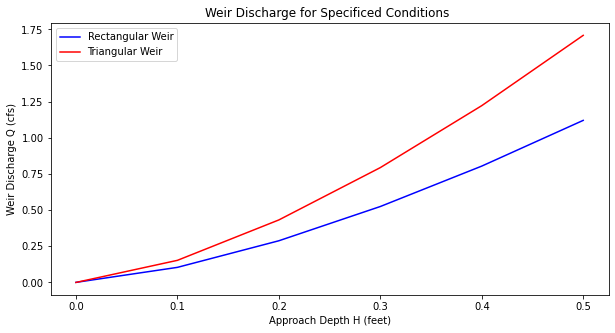

In [141]:
import matplotlib.pyplot # the python plotting library
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio
# Built the plot
matplotlib.pyplot.plot(H, Q, color ='blue') 
matplotlib.pyplot.plot(H, Qt, color ='red') 
matplotlib.pyplot.xlabel("Approach Depth H (feet)") 
matplotlib.pyplot.ylabel("Weir Discharge Q (cfs)") 
matplotlib.pyplot.title("Weir Discharge for Specificed Conditions ")
matplotlib.pyplot.legend(["Rectangular Weir","Triangular Weir"])
matplotlib.pyplot.show() 

In [142]:
# discussion